# SCRIPTS

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime, timedelta
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore", category=UserWarning)

## Limpieza de data

In [34]:
def mostrar_outliers(data,columna):
  # Calcular el rango intercuartílico (IQR)
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  IQR = Q3 - Q1
  # Calcular los límites para detectar outliers
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  # Filtrar outliers
  outliers = data[(data[columna] < lower_limit) | (data[columna] > upper_limit)]
  return outliers
#mostrar_outliers(tudata,"columna")

In [35]:
def eliminar_outliers(data, columna):
    # Calcular el rango intercuartílico (IQR)
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    # Calcular los límites para detectar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Filtrar outliers y devolver el DataFrame sin outliers
    data_sin_outliers = data[(data[columna] >= lower_limit) & (data[columna] <= upper_limit)]
    return data_sin_outliers
#nuevo_dataframe = eliminar_outliers(demoras, 'IntervaloTiempo')

In [36]:
def visualizar_variable(data,columna):
    plt.scatter(range(len(data)), data[columna])
    plt.xlabel("Índice")
    plt.ylabel("Valores")
    plt.show()
#visualizar_variable(data,"humedad_suelo")

## Entendimiento de la data

In [116]:
def cantidad_datos_dentro_limites(data, columna, limite_inferior, limite_superior):
    total = len(data)
    cantidad = len(data[((data[columna]>=limite_inferior) & (data[columna]<=limite_superior))])
    porcentaje = (cantidad/total)*100
    print(f"Número de datos dentro del rango en columna '{columna}': {cantidad} ({porcentaje:.2f}% del total)")
    return cantidad
#cantidad_datos_dentro_limites(data,"temperatura",TEMPERATURA_MINIMA, TEMPERATURA_MAXIMA)

In [37]:
def grafica_dispersion(data,columna1,columna2,etiqueta1,etiqueta2):
    plt.plot(data[columna1], data[columna2], "o")
    plt.xlabel(etiqueta1)
    plt.ylabel(etiqueta2)
    plt.show()
#grafica_dispersion(data,"temperatura","humedad","temperatura","humedad")

In [38]:
def graficar_boxplot(data, columna=None):
    if columna:
        fig, ax = plt.subplots(figsize=(8, 6))
        data[columna].plot(kind='box')
        ax.set_title(f'Boxplot de la columna {columna}')
        plt.show()
    else:
        fig = plt.figure(figsize=(16, 20))
        ax = fig.gca()
        (data.rename(columns=lambda x: str(x))
             .plot(ax=ax, kind='box', subplots=True, layout=(6, 5))
        )
        plt.show()
#graficar_boxplot(data, "Y")
#graficar_boxplot(data)

In [39]:
def histograma(data):
  fig = plt.figure(figsize = (20,20))
  ax = fig.gca()
  data.hist(ax=ax)
  plt.show()
#histograma(data)

In [40]:
def diagrama_densidad(data):
  fig = plt.figure(figsize = (20,20))
  ax = fig.gca()
  data.plot(ax=ax, kind='density', subplots=True, layout=(8,8), sharex=False, legend=True)
  plt.show()
#diagrama_densidad(data)

In [41]:
def graficar_correlacion(data):
  correlation = data.corr()
  plt.figure(figsize=(12,12))
  ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
  plt.title('Correlación entre variables')
  plt.show()
#graficar_correlacion(data)

In [180]:
def normalizar_data(data):
    columns_to_normalize = ['temperatura', 'humedad', 'intensidad_luz', 'humedad_suelo']
    scaler = MinMaxScaler() # Instancia el MinMaxScaler
    df = pd.DataFrame()
    df[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize]) # Aplica la normalización a las columnas seleccionadas
    #print(df.head()) # Visualiza el DataFrame después de la normalización
    return df
#normalizar_data(data)

# ANÁLISIS

## Diccionario de datos

| Columna|Descripción|Tipo de Datos|Unidades|
|---|---|---|---|
| temperatura	| Temperatura del ambiente | Número decimal | $\textcelsius$|
|humedad|Humedad relativa del ambiente (HR)|Número decimal| %|
|intensidad_luz|Intensidad de luz|Número decimal|lux|
|humedad_suelo|Humedad del suelo|Número decimal|%|

## Importando data

In [144]:
data = pd.read_csv("data.csv")
data.head(3)

,id,fecha,hora,temperatura,humedad,intensidad_luz,humedad_suelo
0,1,2024-01-28,22:46:29,17.6,65.2,76.67,4.67
1,2,2024-01-28,22:46:33,17.6,65.2,76.67,5.28
2,3,2024-01-28,22:46:37,17.6,65.3,76.67,4.06


In [145]:
# últimas filas
data.tail(3)

,id,fecha,hora,temperatura,humedad,intensidad_luz,humedad_suelo
4115,4116,2024-02-03,22:45:06,20.0,64.5,50.00,-0.67
4116,4117,2024-02-03,22:45:10,20.0,64.4,50.00,-0.67
4117,4118,2024-02-03,22:45:13,20.0,64.5,50.83,-1.03


## Rangos de las variables

In [146]:
# Selecciono las columnas que voy a usar
data = data[["temperatura","humedad","intensidad_luz","humedad_suelo"]]

In [147]:
# Rangos para condiciones ideales
TEMPERATURA_MINIMA, TEMPERATURA_MAXIMA = 30, 35
HUMEDAD_MINIMA, HUMEDAD_MAXIMA= 30, 70
LUMINOSIDAD_MINIMA, LUMINOSIDAD_MAXIMA= 30, 150
HUMEDAD_SUELO_MINIMA, HUMEDAD_SUELO_MAXIMA = 20, 80

In [148]:
data.describe().T[["min","max"]]

,min,max
temperatura,15.30,20.00
humedad,63.70,68.70
intensidad_luz,0.00,99.17
humedad_suelo,-2.92,96.60


In [149]:
# Solo la columna "humedad" está dentro de las condiciones ideales
# Trabajaremos con los datos aún así no estén dentro de las condiciones ideales
cantidad_datos_dentro_limites(data,"temperatura",TEMPERATURA_MINIMA, TEMPERATURA_MAXIMA)
cantidad_datos_dentro_limites(data,"humedad",HUMEDAD_MINIMA, HUMEDAD_MAXIMA)
cantidad_datos_dentro_limites(data,"intensidad_luz",LUMINOSIDAD_MINIMA, LUMINOSIDAD_MAXIMA)
cantidad_datos_dentro_limites(data,"humedad_suelo",HUMEDAD_SUELO_MINIMA, HUMEDAD_SUELO_MAXIMA)

Número de datos dentro del rango en columna 'temperatura': 0 (0.00% del total)
Número de datos dentro del rango en columna 'humedad': 4118 (100.00% del total)
Número de datos dentro del rango en columna 'intensidad_luz': 481 (11.68% del total)
Número de datos dentro del rango en columna 'humedad_suelo': 0 (0.00% del total)


0

## Limpieza de data

In [150]:
# Ver en que columnas hay valores nan (Vemos que no hay datos faltantes)
data.isna().any()

temperatura       False
humedad           False
intensidad_luz    False
humedad_suelo     False
dtype: bool

<Axes: >

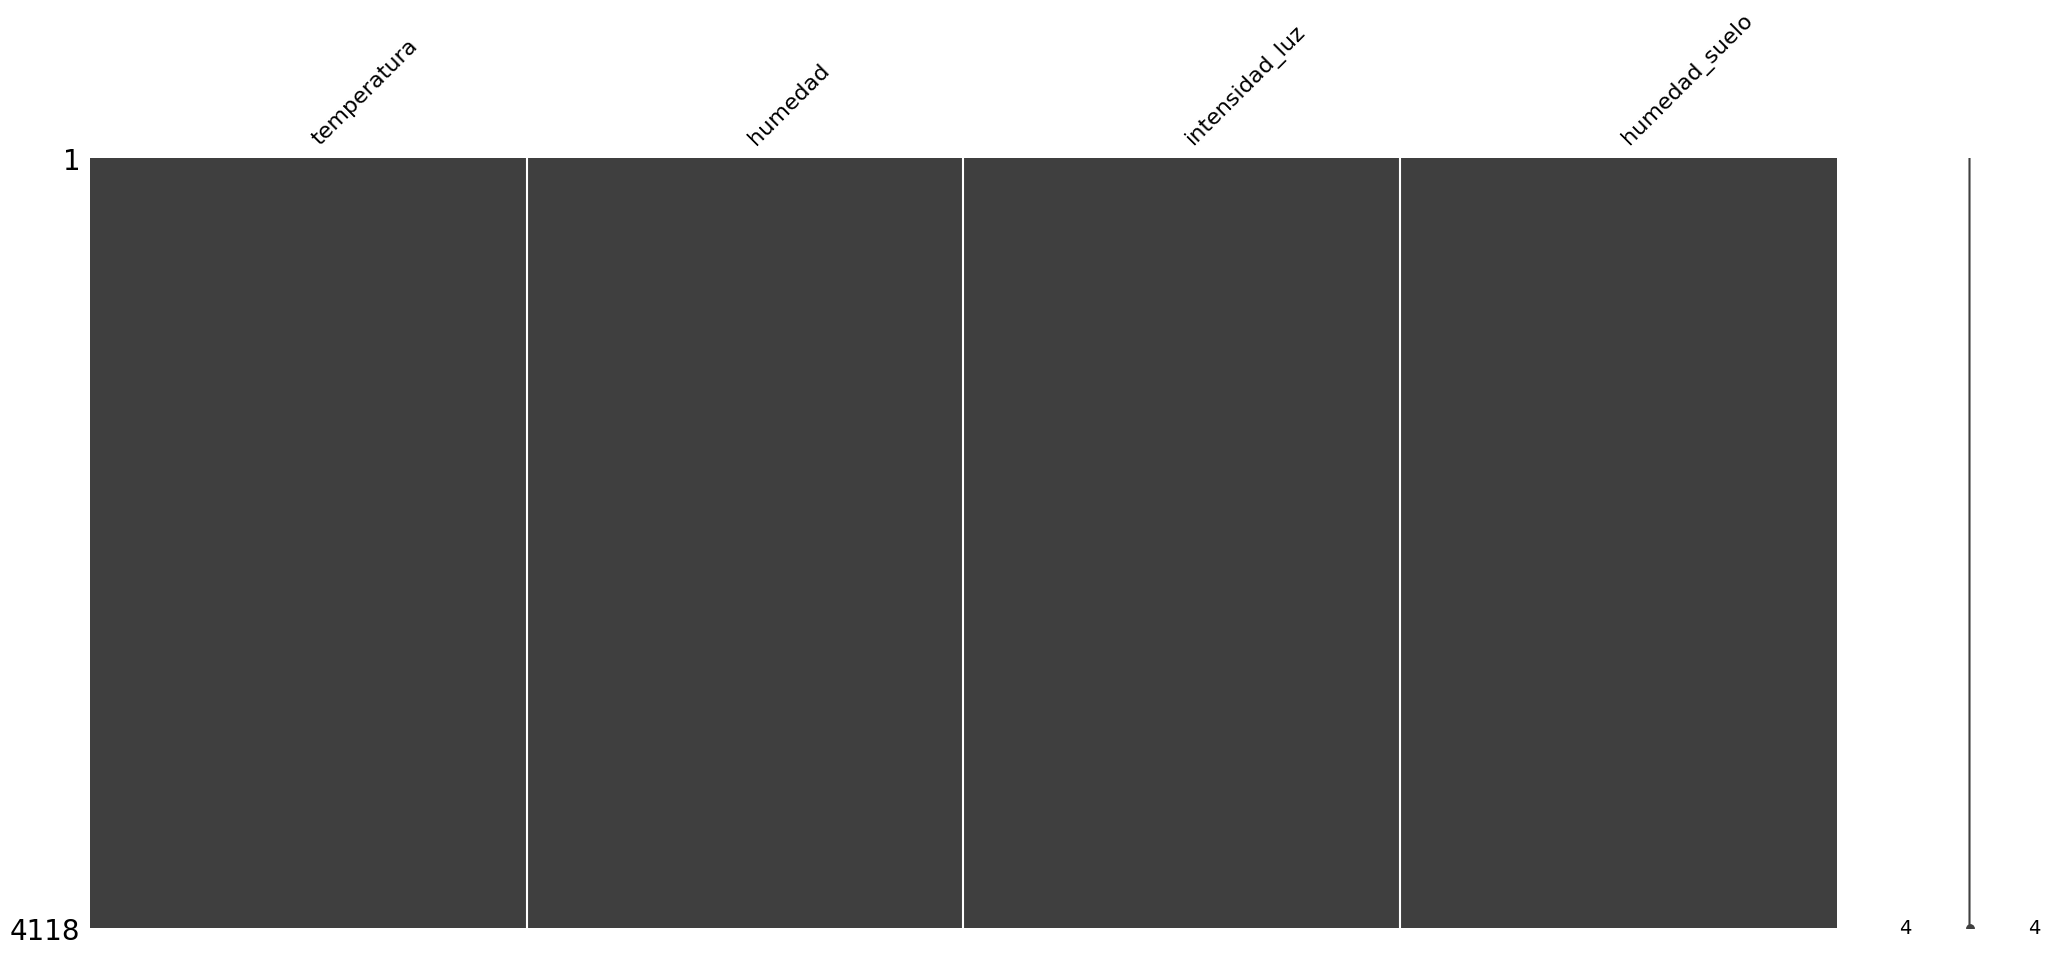

In [151]:
# Se observa que no hay valores nan (valores faltantes)
msno.matrix(data)

In [152]:
# Selecciono las columnas con las que voy a trabajar
data = data[["temperatura","humedad","intensidad_luz","humedad_suelo"]]
data.head(3)

,temperatura,humedad,intensidad_luz,humedad_suelo
0,17.6,65.2,76.67,4.67
1,17.6,65.2,76.67,5.28
2,17.6,65.3,76.67,4.06


In [153]:
# Hay valores igual a 0 o negativos
data[(data["temperatura"]<=0) | (data["humedad"]<=0) | (data["intensidad_luz"]<=0) | (data["humedad_suelo"]<=0)]

,temperatura,humedad,intensidad_luz,humedad_suelo
1340,16.4,66.4,10.00,-0.55
2019,16.8,65.0,11.67,-1.95
2648,15.6,68.1,0.00,11.16
2652,15.8,67.3,0.00,8.49
2653,15.8,67.2,0.00,9.34
...,...,...,...,...
4113,19.9,65.0,50.00,-0.97
4114,19.9,64.8,50.00,-0.55
4115,20.0,64.5,50.00,-0.67
4116,20.0,64.4,50.00,-0.67


In [154]:
# Elimino las filas que tienen valores 0 o negativos
data=data[~((data["temperatura"]<=0) | (data["humedad"]<=0) | (data["intensidad_luz"]<=0) | (data["humedad_suelo"]<=0))]

### Elimino outliers de: **humedad_suelo**

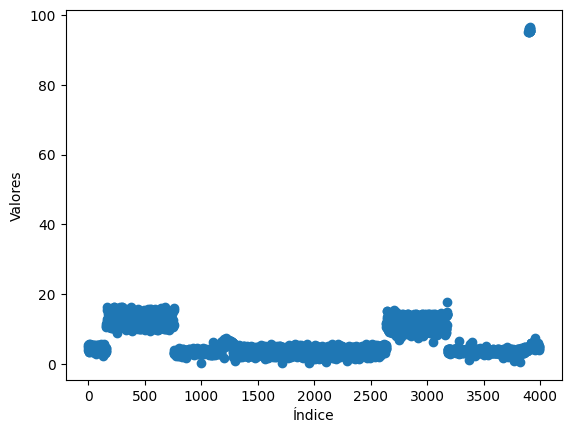

In [155]:
visualizar_variable(data,"humedad_suelo")

In [158]:
outliers_hs = mostrar_outliers(data, "humedad_suelo")
print(f"Número de outliers: {outliers_hs.shape[0]}")
outliers_hs.head(3)

Número de outliers: 18


,temperatura,humedad,intensidad_luz,humedad_suelo
3940,17.2,65.8,68.33,95.21
3941,17.2,65.2,47.50,96.42
3942,17.2,65.2,48.33,95.21


In [159]:
data = eliminar_outliers(data, "humedad_suelo")

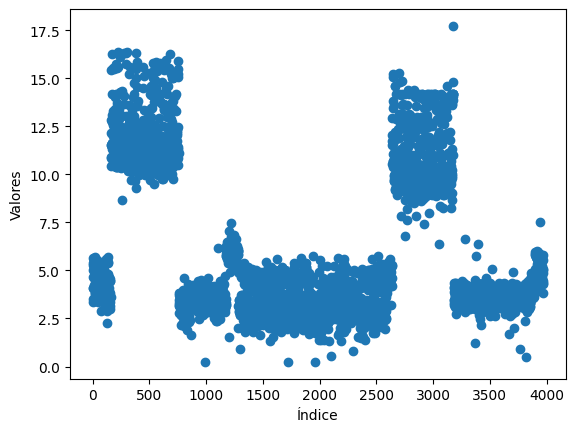

In [160]:
visualizar_variable(data,"humedad_suelo")

## Entendimiento de la data

### Cantidad de datos

In [161]:
data.shape

(3974, 4)

### Tipo de datos

In [162]:
data.dtypes

temperatura       float64
humedad           float64
intensidad_luz    float64
humedad_suelo     float64
dtype: object

## Estadísticas

### Crear data normalizada

In [187]:
data_normalizada = normalizar_data(data)
data_normalizada.head(3)

,temperatura,humedad,intensidad_luz,humedad_suelo
0,1.0,0.30,0.771202,0.253432
1,1.0,0.30,0.771202,0.288330
2,1.0,0.32,0.771202,0.218535


### Descripción general

In [163]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatura,3974.0,16.675365,0.481863,15.30,16.40,16.60,17.00,17.60
humedad,3974.0,65.667237,0.724456,63.70,65.10,65.60,66.20,68.70
intensidad_luz,3974.0,22.418749,17.047591,0.83,10.83,20.83,22.50,99.17
humedad_suelo,3974.0,5.804577,3.727497,0.24,3.15,3.82,9.65,17.72


### Diagrama de dispersión por pares

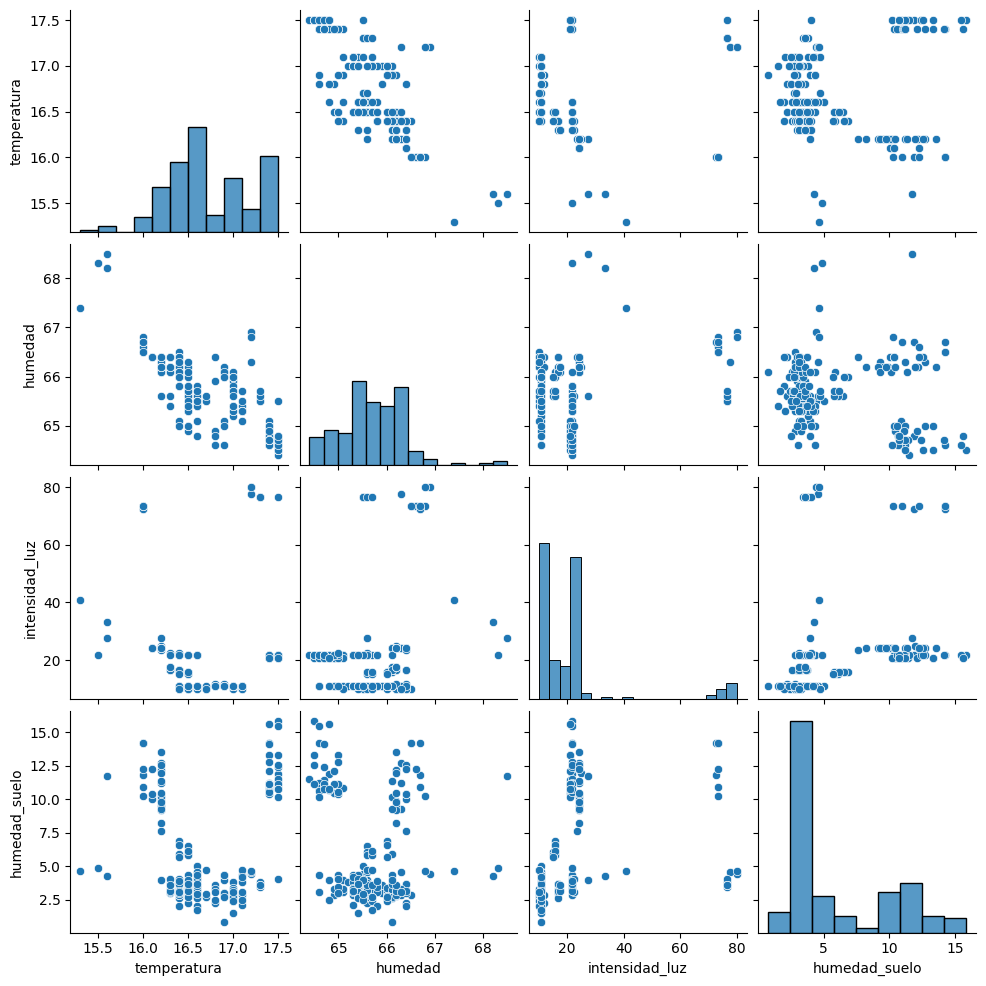

In [188]:
sns.pairplot(data.sample(200))
plt.show()

## Visualización del conjunto de datos

### Gráficos univariados

#### Boxplots

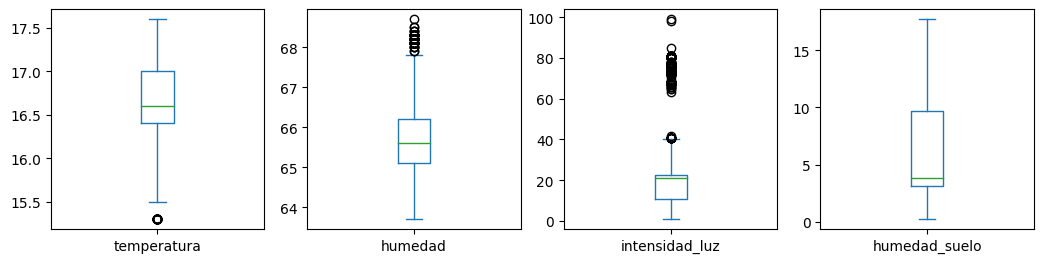

In [57]:
# Boxplot de todas las columnas
graficar_boxplot(data)

#### Histograma

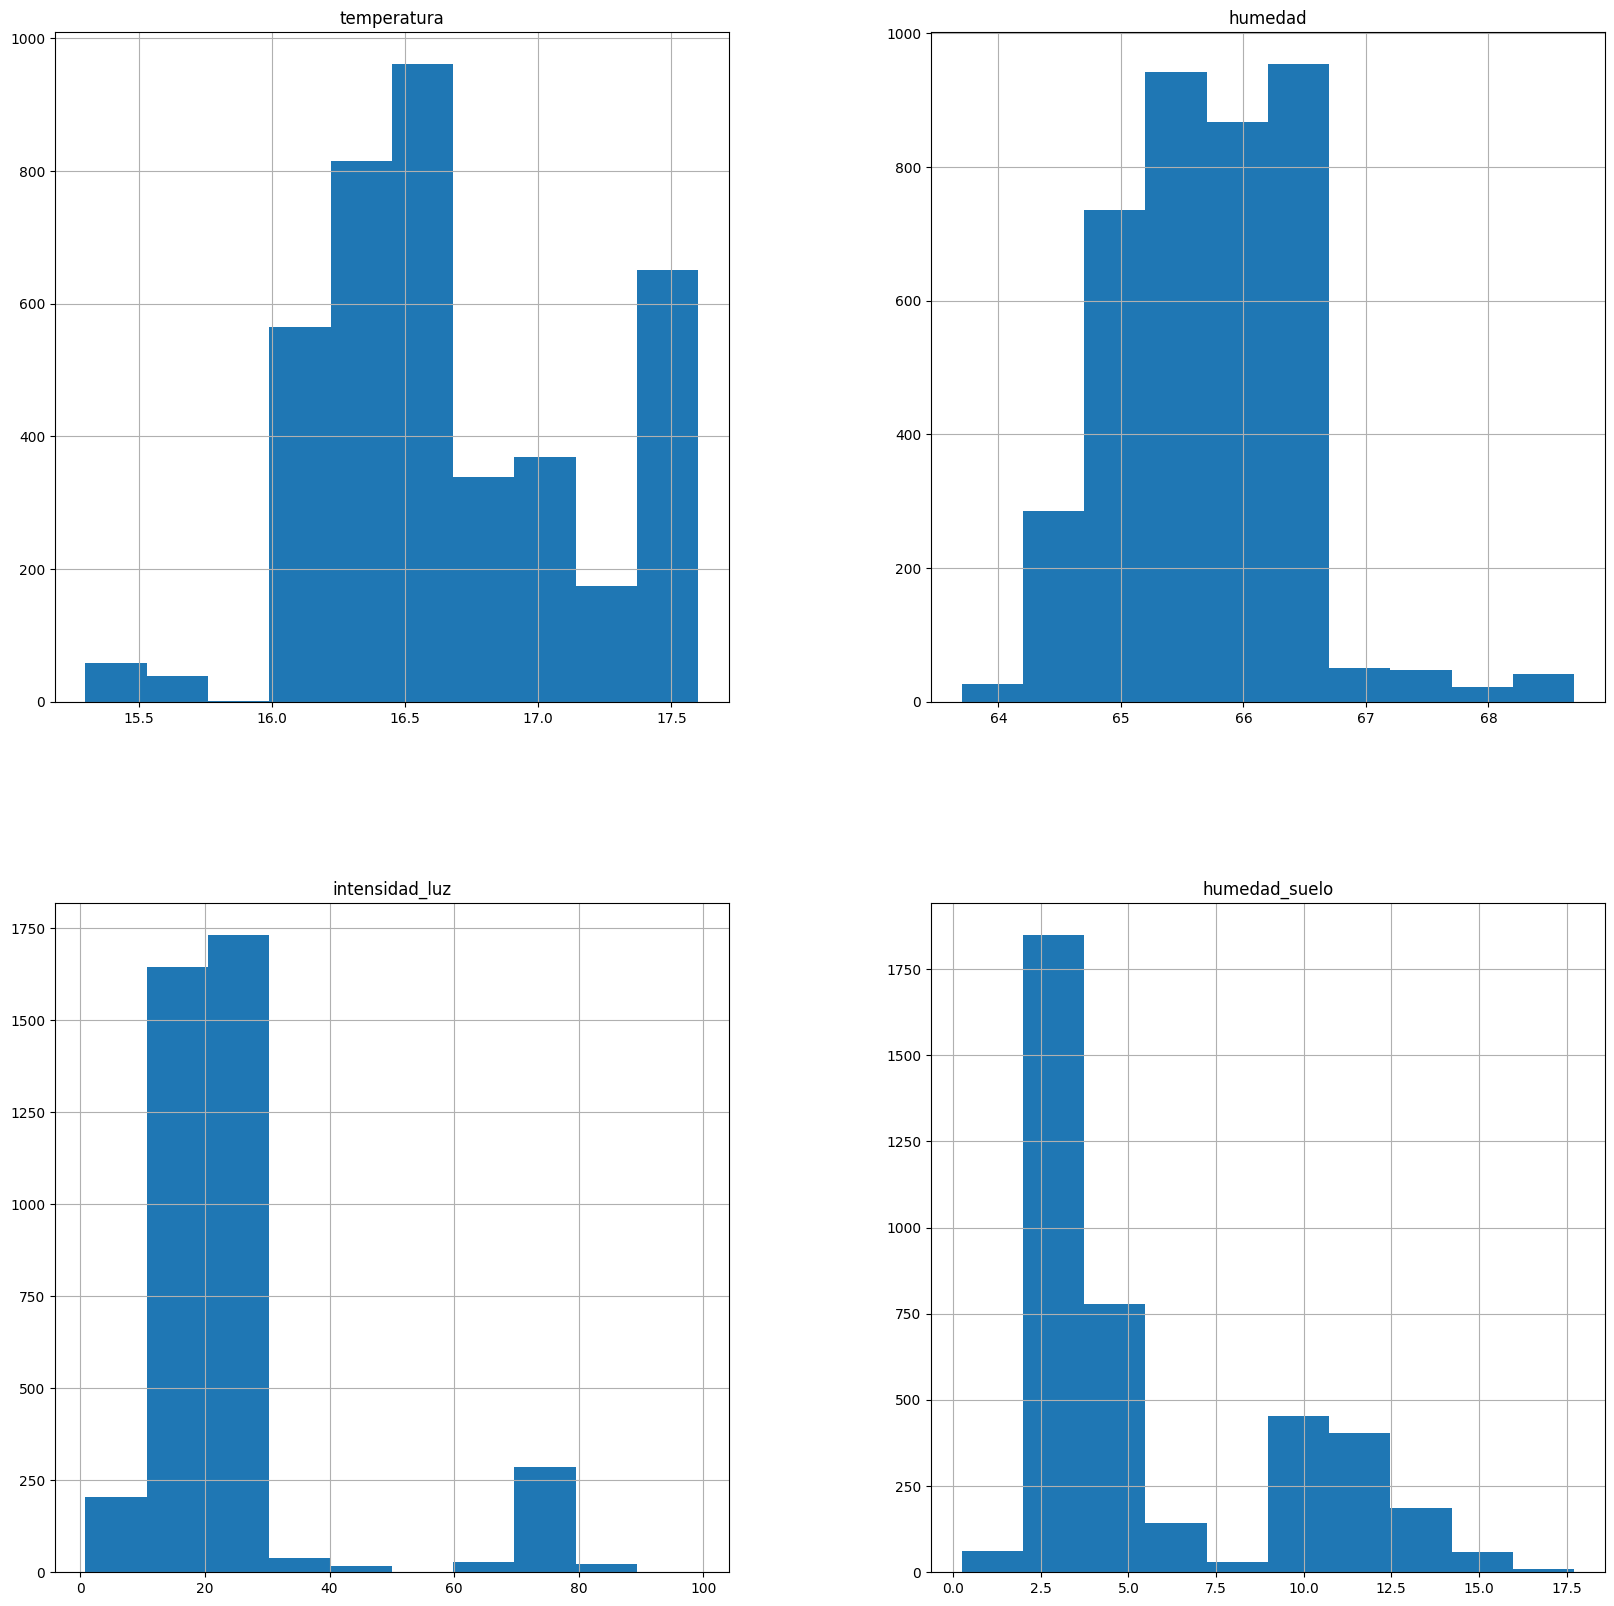

In [58]:
histograma(data)

#### Diagrama de densidad

Util para ver si tienen una distribución sesgada (distribución de probabilidad que no es simétrica).  
Consecuencias del sesgo:  
* Las medidas de tendencia central pueden ser engañosas: la media, la mediana y la moda pueden no reflejar el valor central de la distribución.
* Los intervalos de confianza y las pruebas de hipótesis pueden ser inexactos: si la distribución es sesgada, los métodos estadísticos estándar pueden no ser confiables.

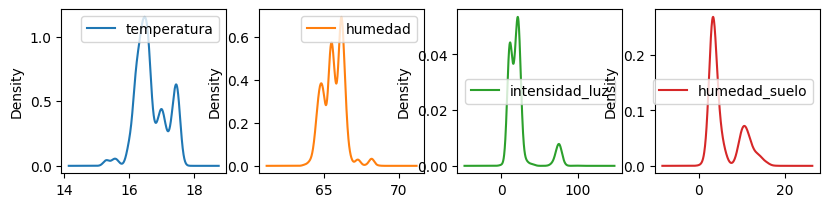

In [59]:
diagrama_densidad(data)

### Gráficos multivariados

#### Correlación entre atributos

* Este gráfico nos permite ver de forma visual la correlación entre los atributos.
* El amarilo alrededor de la diagonal sugiere que los atributos que están uno al lado del otro generalmente están más correlacionados entre sí. 
* Una buena práctica es tomar el valor de 0.7 o -0.7 entre dos atributos o variables para decir que tienen una fuerte correlación o relación.

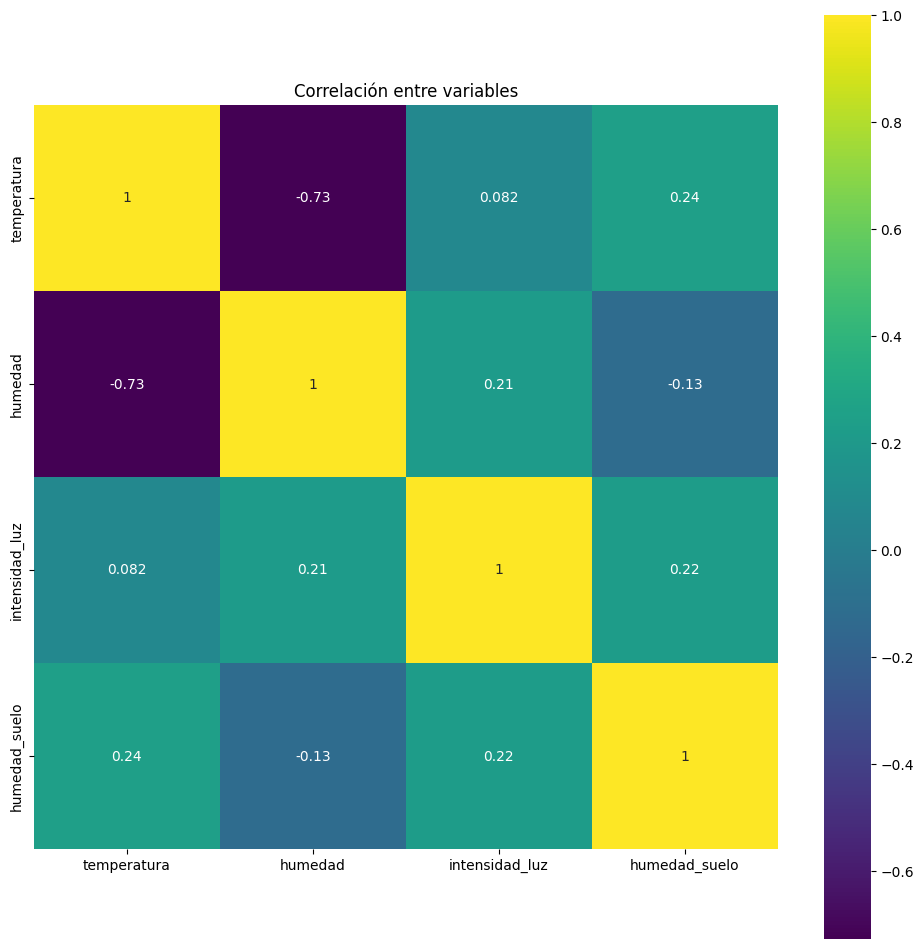

In [60]:
graficar_correlacion(data)

## Machine Learning

### Kmeans y DBscan

* No se observan agrupaciones claras

In [232]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# Normalización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# K-means
kmeans = KMeans(n_clusters=4, n_init=10) #n_init=numero de veces se ejecuta el algoritmo con diferentes centroides
kmeans.fit(data_scaled)
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(data_scaled)

DBSCAN(eps=1.5)

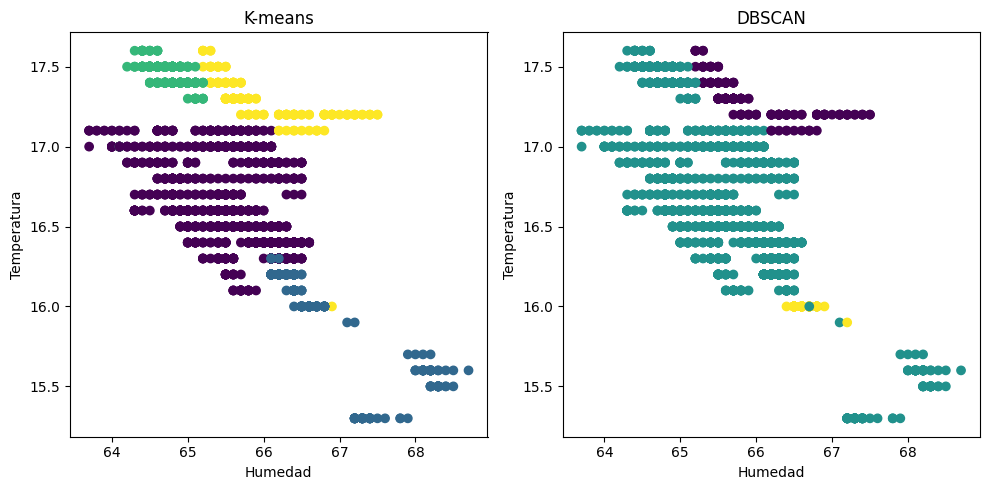

In [233]:
plt.figure(figsize=(10, 5))
# K-means
plt.subplot(1, 2, 1)
plt.scatter(data['humedad'], data['temperatura'], c=kmeans.labels_, cmap='viridis')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('K-means')
plt.xlabel('Humedad')
plt.ylabel('Temperatura')

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(data['humedad'], data['temperatura'], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('Humedad')
plt.ylabel('Temperatura')

plt.tight_layout()
plt.show()

### Regresión Lineal

In [235]:
#Modelo Lineal
x=data['humedad']
x=x.values.reshape(-1,1)#x debe tener 2 dimensiones
y=data['temperatura']
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train),len(y_test)

(3179, 795)

In [236]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [252]:
m=regression_model.coef_
b=regression_model.intercept_
print(m)  #pendiente (m) y=mx+b
print(b) #el intercepto b

[-0.48077823]
48.243623551101535


In [251]:
#Bondad de ajuste (capacidad predictiva) (0.537 es capacidad predictiva moderada)
regression_model.score(x_test,y_test) #r2: factor de determinacion

0.5373100296342711

In [240]:
#Metricas del error del modelo MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred=regression_model.predict(x_test) #prediccion con la data de test

In [241]:
mean_squared_error(y_test,y_pred) #MSE=varianza promedio

0.1070467480118166

In [242]:
mean_absolute_error(y_test,y_pred) #MAE=diferencia absoluta promedio

0.26857912205752565

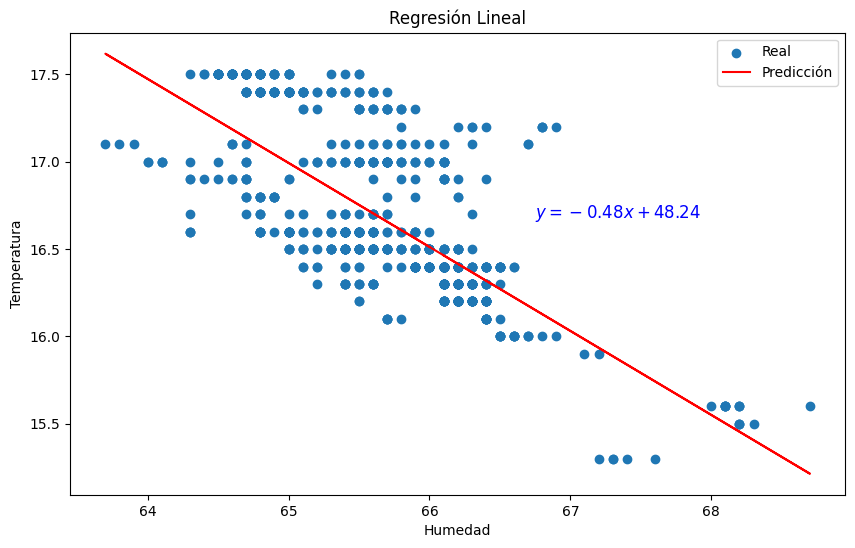

In [271]:
import matplotlib.pyplot as plt
# Gráfico de dispersión de datos reales y línea de regresión
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, label='Real')
plt.plot(x_test, y_pred, label='Predicción', color='r')
# Coeficientes de la regresión lineal
m = regression_model.coef_[0]
b = regression_model.intercept_
# Agrega la ecuación en el gráfico
equation_text = f'$y = {m:.2f}x + {b:.2f}$'
plt.text(0.6, 0.6, equation_text, fontsize=12, color='blue', transform=plt.gca().transAxes)
# Configuración adicional del gráfico
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.title("Regresión Lineal")
plt.legend()
plt.show()